

# Two Problems for Lab 3:


# Problem 1: Gender Recognition by Voice

From the description file at https://data.world/ml-research/gender-recognition-by-voice:

In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:

*  [The Harvard-Haskins Database of Regularly-Timed Speech](http://nsi.wegall.net/)
*  Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
*  [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
*  [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/dbs_awb.html)

Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.

The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above
Acoustic Properties Measured

The following acoustic properties of each voice are measured:

*    __duration:__ length of signal
*    __meanfreq:__ mean frequency (in kHz)
*    __sd:__ standard deviation of frequency
*    __median:__ median frequency (in kHz)
*    __Q25:__ first quantile (in kHz)
*    __Q75:__ third quantile (in kHz)
*    __IQR:__ interquantile range (in kHz)
*    __skew:__ skewness (see note in specprop description)
*    __kurt:__ kurtosis (see note in specprop description)
*    __sp.ent:__ spectral entropy
*    __sfm:__ spectral flatness
*    __mode:__ mode frequency
*    __centroid:__ frequency centroid (see specprop)
*    __peakf:__ peak frequency (frequency with highest energy)
*    __meanfun:__ average of fundamental frequency measured across acoustic signal
*    __minfun:__ minimum fundamental frequency measured across acoustic signal
*    __maxfun:__ maximum fundamental frequency measured across acoustic signal
*    __meandom:__ average of dominant frequency measured across acoustic signal
*    __mindom:__ minimum of dominant frequency measured across acoustic signal
*    __maxdom:__ maximum of dominant frequency measured across acoustic signal
*    __dfrange:__ range of dominant frequency measured across acoustic signal
*    __modindx:__ modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

The gender of the speaker is given in the __label__ column. 

Note, the features for duration and peak frequency (peakf) were removed from training. Duration refers to the length of the recording, which for training, is cut off at 20 seconds. Peakf was omitted from calculation due to time and CPU constraints in calculating the value. In this case, all records will have the same value for duration (20) and peak frequency (0).

Load file using the code below. 

#### Question 1:

Which two features are most indicative of gendered voice?

#### Question 2:

Preform Linear Regression, Logistic Regression, and Quadratic Discriminant Analysis on the features, graphing the resulting fits. How does the two feature fit compare to the fit on all features?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import io
import requests

data = pd.read_csv("voice.csv")

data.head()

## Drop Feature Columns X
X = data.drop(columns=["label"])

## Set Up Target Variables y
y = data["label"]

## Normalize feature data by centering on the mean and dividing by std
X = (X - X.mean())/X.std()

In [2]:
dummy = pd.get_dummies(data['label'])
df = pd.concat((data,dummy),axis =1)
df = df.drop(['label'], axis =1)
df = df.drop(['male'], axis = 1)
df = df.rename(columns ={"female":"Gender"})
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


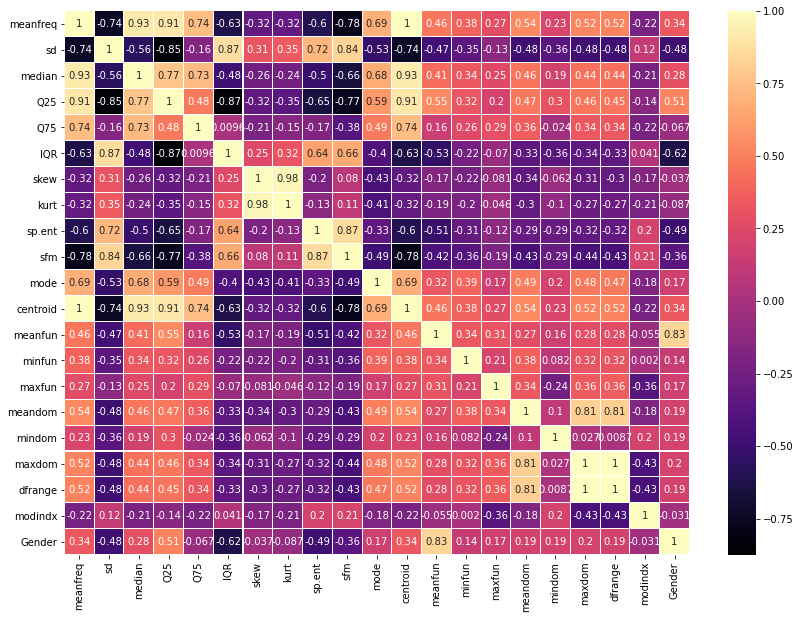

In [3]:
fig,ax = plt.subplots(figsize=(14, 10))

sns.heatmap(df.corr(), ax=ax, annot = True, linewidths=0.05,cmap="magma")
plt.show()

Two features which are highly indicative of Gender Voices are IQR (Interquantile Range (in kHz)) & Meanfun (average of fundamental frequency measured across acoustic signal)


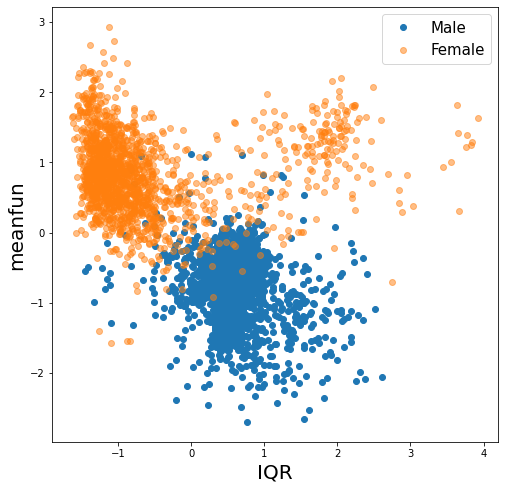

In [4]:
f, ax = plt.subplots(figsize=(8,8))

M = y=="male"
F = y=="female"

plt.plot(X["IQR"][M],X["meanfun"][M],'o',label="Male")

## We set alpha=.5 to try to avoid masking, but some points still will be burried. 
plt.plot(X["IQR"][F],X["meanfun"][F],'o',label="Female",alpha=.5)

plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

In [5]:
from sklearn.linear_model import LinearRegression

y_train = pd.get_dummies(y)

lr = LinearRegression()
lr.fit(X,y_train)

print("The r^2 score on the training data for all features is %.3f"%(lr.score(X,y_train),))

B0_all = lr.intercept_
B_all = lr.coef_

print("The Linear Coefficients:\n", B_all)
print("The Intercept:", B0_all)

X_train = X[['IQR',"meanfun"]]

lr = LinearRegression()
lr.fit(X_train,y_train)

print("The r^2 score on the training data for two highly indicative features is %.3f"%(lr.score(X_train,y_train),))

B0 = lr.intercept_
B = lr.coef_

print("The Linear Coefficients:\n", B)
print("The Intercept:", B0)

The r^2 score on the training data for all features is 0.805
The Linear Coefficients:
 [[-2.47221633e+09 -6.44108646e-02  4.21610052e-02  6.58768072e+11
  -3.19903301e+11  5.78970311e+11  1.36774933e-01 -6.30823771e-02
   2.63553347e-02  6.89124405e-02 -3.81638758e-02  2.47221633e+09
   4.00305007e-01 -5.66157386e-02 -2.16283531e-02  3.52751757e-02
  -4.56088623e+07  2.53708169e+09 -2.53627651e+09 -3.35386288e-03]
 [ 2.47221633e+09  6.44108646e-02 -4.21610052e-02 -6.58768072e+11
   3.19903301e+11 -5.78970311e+11 -1.36774933e-01  6.30823771e-02
  -2.63553347e-02 -6.89124405e-02  3.81638758e-02 -2.47221633e+09
  -4.00305007e-01  5.66157386e-02  2.16283531e-02 -3.52751757e-02
   4.56088623e+07 -2.53708169e+09  2.53627651e+09  3.35386288e-03]]
The Intercept: [0.49339434 0.50660566]
The r^2 score on the training data for two highly indicative features is 0.737
The Linear Coefficients:
 [[-0.12125969  0.35221767]
 [ 0.12125969 -0.35221767]]
The Intercept: [0.5 0.5]


(-2.9824061028118374, 3.2173047659064125)

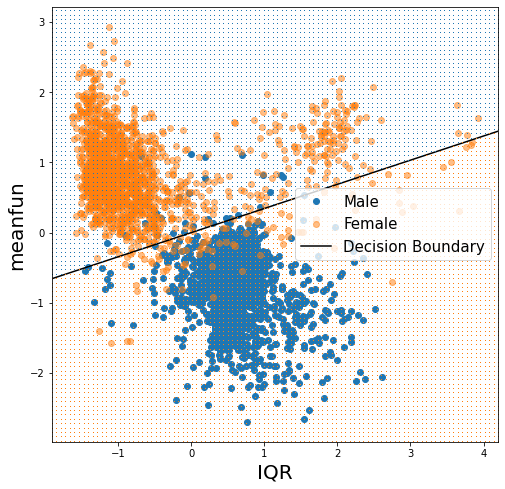

In [6]:
f, ax = plt.subplots(figsize=(8, 8))

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[M],X2[M],'o',label="Male")
plt.plot(X1[F],X2[F],'o',label="Female",alpha=.5)

xm,xM = plt.xlim()
ym,yM = plt.ylim()

u = np.linspace(xm,xM, 2)
v = (u*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
plt.plot(u,v,label="Decision Boundary",color="black")


XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

z1 = YY >(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
z2 = YY <(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")


plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

Score for all features in QDA: 0.944
Score for Two highly indicative features in QDA: 0.966


D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(-2.9824061028118374, 3.2173047659064125)

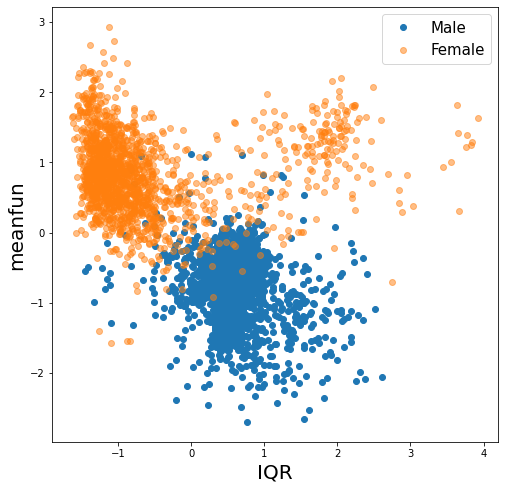

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)

#Fitting all features in model
qda.fit(X, y)
print("Score for all features in QDA: %.3f"%qda.score(X,y))

#Fitting only two highly indicative features into model
qda.fit(X_train, y)
print("Score for Two highly indicative features in QDA: %.3f"%qda.score(X_train,y))

f, ax = plt.subplots(figsize=(8,8))

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[M],X2[M],'o',label="Male")
plt.plot(X1[F],X2[F],'o',label="Female",alpha=.5)

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = qda.predict(grid).reshape(XX.shape)  
z1 = ZZ == 'M'
z2 = ZZ == 'F'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")


plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

Score for all features in LDA: 0.968
Score for two highly indicative features in LDA: 0.961


(-2.9824061028118374, 3.2173047659064125)

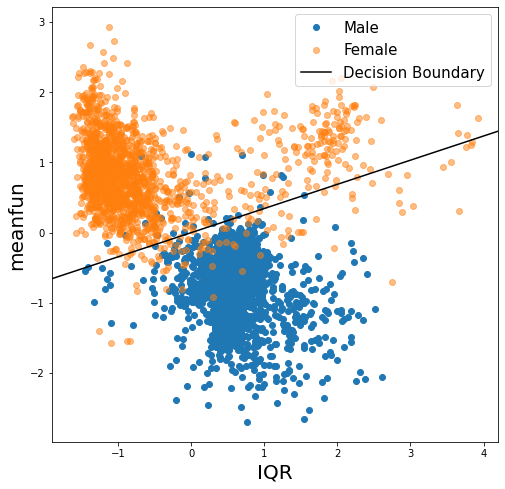

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)

#Fitting all features in model
lda.fit(X, y)
print("Score for all features in LDA: %.3f"%lda.score(X,y))

#Fitting only two highly indicative features into model
lda.fit(X_train, y)
print("Score for two highly indicative features in LDA: %.3f"%lda.score(X_train,y))

f, ax = plt.subplots(figsize=(8,8))

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[M],X2[M],'o',label="Male")
plt.plot(X1[F],X2[F],'o',label="Female",alpha=.5)


xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 


grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = qda.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid

z1 = ZZ == 'M'
z2 = ZZ == 'F'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

plt.plot(u,v,label="Decision Boundary",color="black")


plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

Score for all features in Logistic Regression: 0.975
Score for two highly indictive features in Logistic Regression: 0.966


(-2.9824061028118374, 3.2173047659064125)

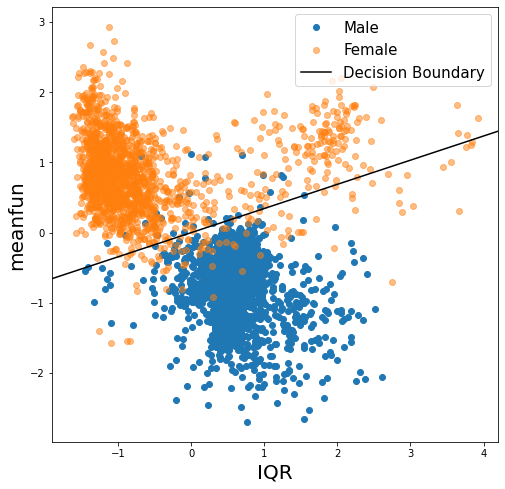

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#Fitting all features into Model
clf.fit(X,y)
print("Score for all features in Logistic Regression: %.3f"%clf.score(X,y))

#Fitting only two features into model
clf.fit(X_train,y)
print("Score for two highly indictive features in Logistic Regression: %.3f"%clf.score(X_train,y))

f, ax = plt.subplots(figsize=(8,8))

X1 = X["IQR"]
X2 = X["meanfun"]

plt.plot(X1[M],X2[M],'o',label="Male")
plt.plot(X1[F],X2[F],'o',label="Female",alpha=.5)

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 


grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = clf.predict(grid).reshape(XX.shape)  
z1 = ZZ == 'M'
z2 = ZZ == 'F'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

plt.plot(u,v,label="Decision Boundary",color="black")


plt.xlabel("IQR",fontsize=20)
plt.ylabel("meanfun",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

In [10]:
#Cross Validation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X[["IQR","meanfun"]], y, test_size=0.4)

## Linear Regression Analysis

lr = LinearRegression()
lr.fit(X_train, pd.get_dummies(y_train))
y_hat = np.argmax(lr.predict(X_test), axis=1)
y_true = np.argmax(np.matrix(pd.get_dummies(y_test)), axis=1)
lr_2 = accuracy_score(y_hat,y_true)

## Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)
lda_2 = lda.score(X_test,y_test)

## Quadratic Discriminant Analysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)
qda_2 = qda.score(X_test,y_test)

## Logisitic Regression

clf = LogisticRegression()
clf.fit(X_train,y_train)
clf_2 = clf.score(X_test,y_test)


#For All Features

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4)

## Linear Regression Analysis

lr2 = LinearRegression()
lr2.fit(X_train2, pd.get_dummies(y_train2))
y_hat = np.argmax(lr2.predict(X_test2), axis=1)
y_true = np.argmax(np.matrix(pd.get_dummies(y_test2)), axis=1)
lr_all = accuracy_score(y_hat,y_true)

## Linear Discriminant Analysis

lda2 = LinearDiscriminantAnalysis(store_covariance=True)
lda2.fit(X_train2, y_train2)
lda_all = lda2.score(X_test2,y_test2)

## Quadratic Discriminant Analysis

qda2 = QuadraticDiscriminantAnalysis(store_covariance=True)
qda2.fit(X_train2, y_train2)
qda_all = qda2.score(X_test2,y_test2)

## Logisitic Regression

clf2 = LogisticRegression()
clf2.fit(X_train2,y_train2)
clf_all = clf2.score(X_test2,y_test2)

print("Model Name \t All features \t Two features")
print("Linear Reg: \t {0:.3f} \t\t {1:.3f}".format(lr_all,lr_2)) 
print("Logistic Reg: \t {0:.3f} \t\t {1:.3f}".format(clf_all,clf_2))
print("LDA Score: \t {0:.3f} \t\t {1:.3f}".format(lda_all,lda_2))
print("QDA Score: \t {0:.3f} \t\t {1:.3f}".format(qda_all,qda_2))

Model Name 	 All features 	 Two features
Linear Reg: 	 0.969 		 0.962
Logistic Reg: 	 0.974 		 0.963
LDA Score: 	 0.970 		 0.962
QDA Score: 	 0.930 		 0.962


D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


From the above result, we can see that the model fits better to 

In [11]:
def predict_labels(X,y,ax,pred):
    [col0,col1] = X.columns
    labels = set(y)
    
    ## Plot Datapoints By Label
    for l in labels:
        X_l = X[y==l]
        ax.plot(X_l[col0],X_l[col1],'o',label=l,alpha=.5)
        
    ax.set_xlabel(col0,fontsize=20)
    ax.set_ylabel(col1,fontsize=20)
    ax.legend(fontsize=15)
    
    ### Predict on Grid 
    ax.set_title(type(pred).__name__)

<ipython-input-11-13462768a85d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_l = X[y==l]
<ipython-input-11-13462768a85d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_l = X[y==l]
<ipython-input-11-13462768a85d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_l = X[y==l]
<ipython-input-11-13462768a85d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_l = X[y==l]
<ipython-input-11-13462768a85d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_l = X[y==l]
<ipython-input-11-13462768a85d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_l = X[y==l]


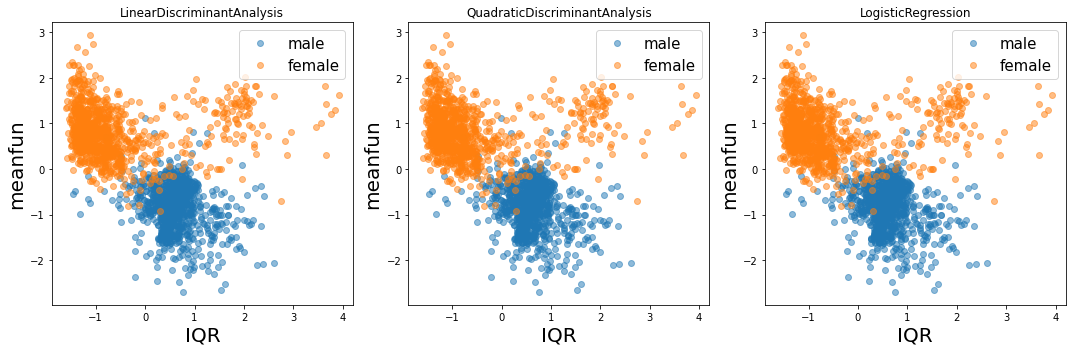

In [12]:
## Liner Regression vis Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)

## Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)

## Logisitic Regression
clf = LogisticRegression()
clf.fit(X_train,y_train)

## Plotting:
f, axes = plt.subplots(1,3, figsize=(15,5))
axes = axes.ravel()

for i, pred in enumerate([lda, qda, clf]):
    predict_labels(X_train,y,axes[i],pred)

plt.tight_layout()

# Problem 2: MRI Data

The dementia level for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels. 

In this problem we want to treat them as categorical. However, we would also like to construct a slightly larger dataset, as we have seen that for images our 700 may not be sufficient. To construct a larger dataset we will again down sample the images, however this time we will use the down sampling to expand the dataset instead of throwing data away. After fixing a down sample rate $D$, we will construct one image out of the pixels $nD$, for $n = 1,2,\ldots, $. We will also construct $n D+i$, for $i = 1,\ldots, D$. This way, by down sampling with a rate $D$, we construct $D$ more pictures. 

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data. 

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'E:/Math/NEU/MATH7243/Labs/MRI_Images/'

labels = pd.read_csv(file_dir + 'labels-1.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [14]:
data = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(487,) (122,)


In [15]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_train = y_train.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros([N_train*DS])
    
for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train[n,i::DS]
        yds_train[n+i] = y[n]

print(Xds_train.shape)

(3896, 3872)


We want to sample the data array using the `data[start:stop:step]` slice paradigm. This means we are taking elements of the array `data` starting at `start`, ending at `stop` with step `step`. This is why previously `data[::DS]` down sampled at a rate of DS. For example, 

    lst = list(range(165)); lst[6::10]
    
returns

    [6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156]

We need to create two new arrays, one of shape $[561\times DS, 30976/DS]$ containing the down sampled data, and one of shape $[561\times DS]$ containing the labels. The for each of the $N_{train}$ images in the training array, we need to create $DS$ new down sampled images, with the downsample starting from $i$:

`Xds_train[n+i, :] = X_train[i::DS]`

This will split our images into DS down sampled images. We then need to be sure to save out the appropriate label:

In [16]:
N_train*DS

3896

In [17]:
N_train

487

### Question 1:

Based on the code above, downsample the test data in the same way.  ()

In [19]:
 DS = 8             # Downsample rate, must be a multiple of 30976

N_test = y_test.shape[0]  # The length of the testing data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_test = np.zeros([N_test*DS, im_size])
yds_test = np.zeros([N_test*DS])
    
for n in range(N_test):
    for i in range(DS):
        Xds_test[n+i,:] = X_test[n,i::DS]
        yds_test[n+i] = y[n] 

print(Xds_test.shape)

(976, 3872)


In [20]:
N_test

122

### Question 2:

Perform LDA, QDA, Logistic Regression and Categorical Linear Regression on the down sampled Oasis 1 dataset. How do these compare to linear regression?

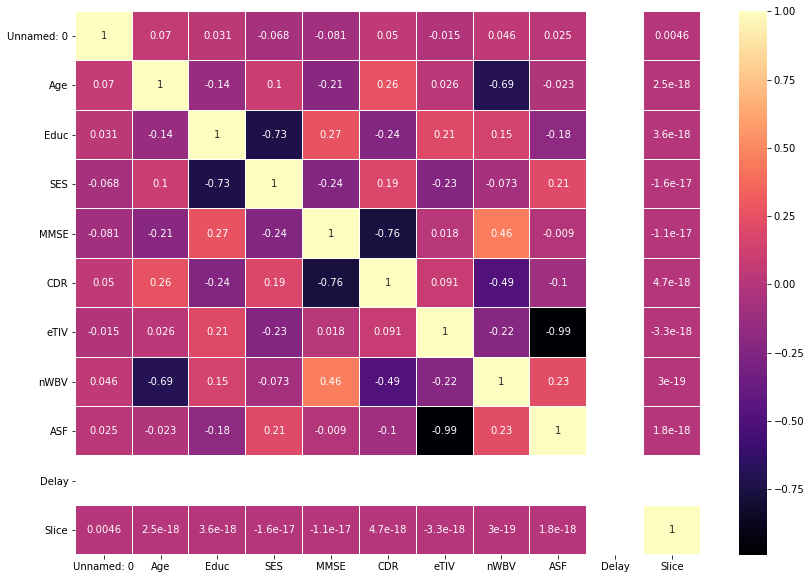

In [21]:
fig,ax = plt.subplots(figsize=(14, 10))

sns.heatmap(labels.corr(), ax=ax, annot = True, linewidths=0.05,cmap="magma")
plt.show()

In [22]:
yds_train = yds_train.astype(np.int64)
yds_test = yds_test.astype(np.int64)

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xds_train,yds_train)

y_pred = lr.predict(Xds_test)
y_pred = y_pred.astype(np.int64)

print("The r^2 score on the training data is %.3f"%(lr.score(Xds_train,yds_train),))
print("Linear Regression Score: %.3f"%accuracy_score(y_pred,yds_test))

The r^2 score on the training data is 1.000
Linear Regression Score: 0.976


In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(Xds_train, yds_train)

y_pred = lda.predict(Xds_test)
y_pred = y_pred.astype(np.int64)

print("Score: %.3f"%lda.score(Xds_train,yds_train))
print("LDA Accuracy Score: %.3f"%accuracy_score(y_pred,yds_test))

Score: 0.993
LDA Accuracy Score: 0.967


In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(Xds_train, yds_train)

y_pred = qda.predict(Xds_test)
y_pred = y_pred.astype(np.int64)

print("Score: %.3f"%qda.score(Xds_train,yds_train))
print("QDA Accuracy Score: %.3f"%accuracy_score(y_pred,yds_test))

D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Score: 1.000
QDA Accuracy Score: 0.881


In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(Xds_train,yds_train)

y_pred = clf.predict(Xds_test)
y_pred = y_pred.astype(np.int64)

print("Score: %.3f"%clf.score(Xds_train,yds_train))
print("Logistic Regression Score: %.3f"%accuracy_score(y_pred,yds_test))

Score: 0.989
Logistic Regression Score: 0.978


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The test accuracy of Categorical Linear Regression 97.6 is very comparable to accuracy using Logistic Regression and LDA which are 97.8 & 96.7 respectively whereas the test accuracy for QDA is 88.1.